In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from activation_layers import ReLU, Softmax
from dense import Dense
from losses import categorical_cross_entropy, categorical_cross_entropy_prime
from network import train, predict
import pandas as pd

In [20]:
df = pd.read_csv('chineseMNIST.csv')
df_label = df['label']
df_images = df.drop(columns=['label', 'character'])
df_label.replace(100, 11, inplace=True)
df_label.replace(1000, 12, inplace=True)
df_label.replace(10000, 13, inplace=True)
df_label.replace(100000000, 14, inplace=True)

In [21]:
def to_categorical(y, num_classes=15):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

In [22]:
# Step 1: Normalize images
df_images_norm = df_images / 255.0

In [23]:
# Step 2: Flatten images
X = df_images_norm.values.reshape(-1, 64 * 64)  # shape: (num_samples, 4096)

In [24]:
# Step 3: One-hot encode labels
y = to_categorical(df_label.values, num_classes=15)  # shape: (num_samples, 15)

In [25]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 5: Define your network
network = [
    Dense(4096, 512),
    ReLU(),
    Dense(512, 256),
    ReLU(),
    Dense(256, 128),
    ReLU(),
    Dense(128, 15),
    Softmax()
]

# Step 6: Train the network
train(network, categorical_cross_entropy, categorical_cross_entropy_prime,
      X_train, y_train, epochs=100, learning_rate=0.01, batch_size=64)

10/100, error=1.879791


20/100, error=1.312071


30/100, error=0.840910


40/100, error=0.525165


50/100, error=0.331906


60/100, error=0.213396


70/100, error=0.140867


80/100, error=0.095722


90/100, error=0.067193


100/100, error=0.049126


In [27]:
# Step 7: Evaluate accuracy
def accuracy(y_true, y_pred):
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    return np.mean(pred_labels == true_labels)

# Predict on test set
predictions = predict(network, X_test)  # X_test shape: (batch_size, features)
acc = accuracy(y_test, predictions)
print(f"Test accuracy: {acc * 100:.2f}%")


Test accuracy: 81.17%


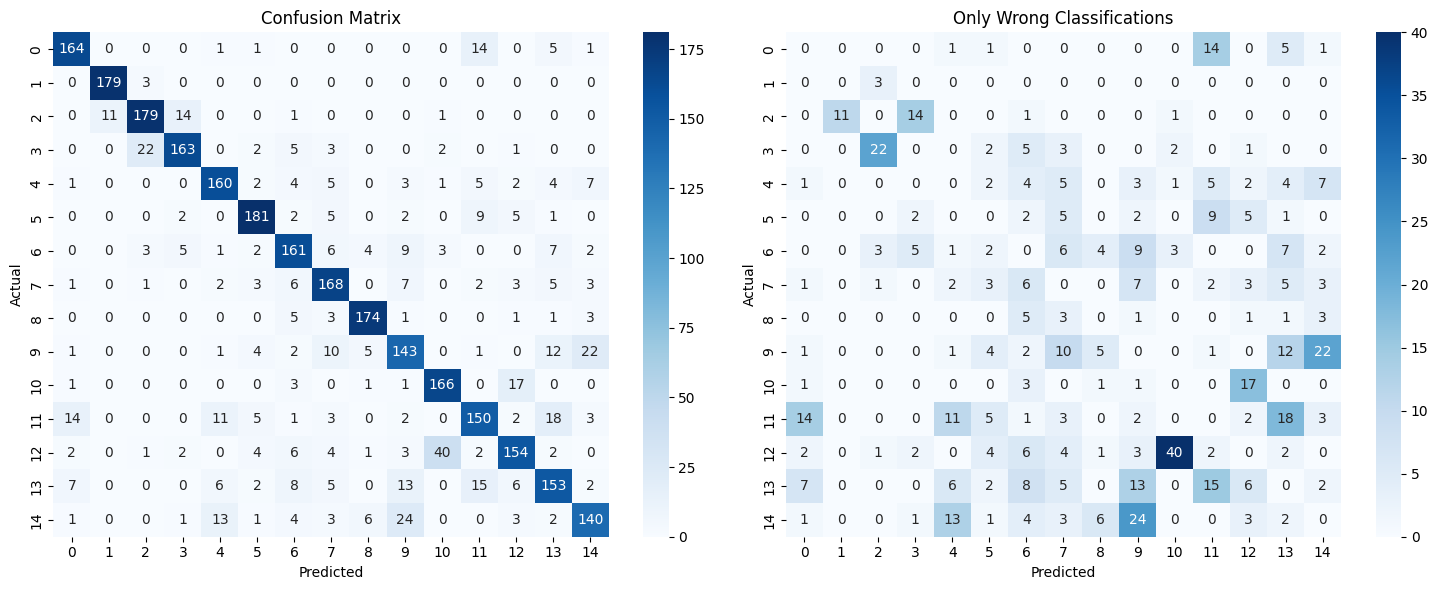

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_pred = [np.argmax(predict(network, X_test[:, i])) for i in range(X_test.shape[1])]
# y_true = [np.argmax(y_test[:, i]) for i in range(y_test.shape[1])]

y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

cm_new = cm.copy()
for i in range(15):
    cm_new[i][i] = 0

sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('Only Wrong Classifications')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [29]:
import pickle

# Extract weights and biases from each Dense layer
W1 = network[0].weights
b1 = network[0].bias
W2 = network[2].weights
b2 = network[2].bias
W3 = network[4].weights
b3 = network[4].bias
W4 = network[6].weights
b4 = network[6].bias

# Store in dictionary
model_dict = {
    'W1': W1, 'b1': b1,
    'W2': W2, 'b2': b2,
    'W3': W3, 'b3': b3,
    'W4': W4, 'b4': b4
}

# Save to file
with open('model.pkl', 'wb') as f:
    pickle.dump(model_dict, f)
